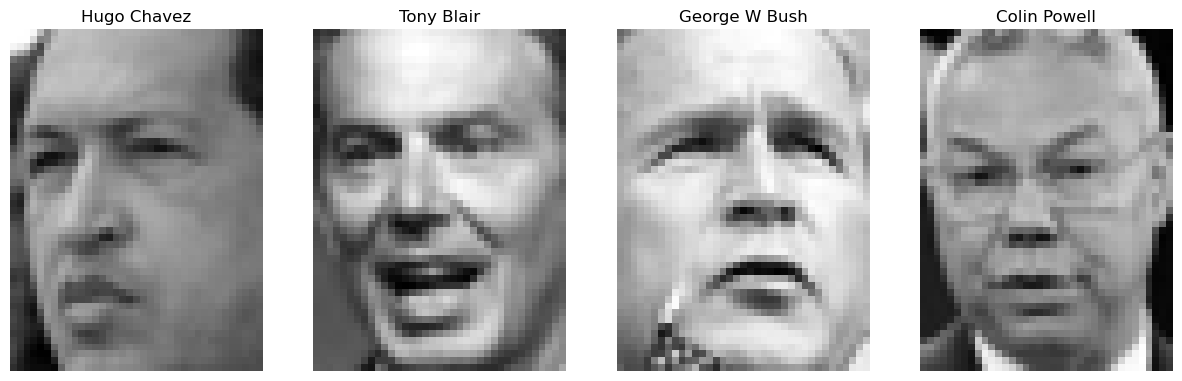

Epoch 10, Average Reconstruction Error: 0.022640634548864124
Epoch 20, Average Reconstruction Error: 0.02036815892435953
Epoch 30, Average Reconstruction Error: 0.018844740922724236
Epoch 40, Average Reconstruction Error: 0.01772824102352049
Epoch 50, Average Reconstruction Error: 0.017369891572086796
Epoch 60, Average Reconstruction Error: 0.016802722806011364
Epoch 70, Average Reconstruction Error: 0.01649837964381577
Epoch 80, Average Reconstruction Error: 0.016307191795163586
Epoch 90, Average Reconstruction Error: 0.015890837129076213
Epoch 100, Average Reconstruction Error: 0.01557563541560746
[[0.19991673 0.22430839 0.29032221 ... 0.62384665 0.56616384 0.46511368]
 [0.52916709 0.53570331 0.57742843 ... 0.68933198 0.66198733 0.54929329]
 [0.46901082 0.43860401 0.53725045 ... 0.40247406 0.26340752 0.23876712]
 [0.14093476 0.37394707 0.30501935 ... 0.35527518 0.40165518 0.25982774]
 [0.17432895 0.2072111  0.29385786 ... 0.67579502 0.58941209 0.59414855]]


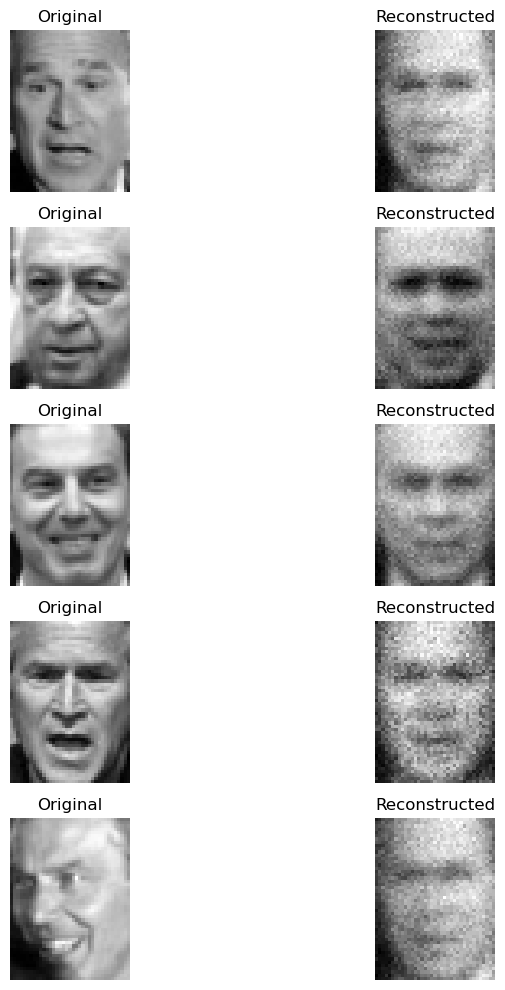

Epoch 110, Average Reconstruction Error: 0.015371400297685207
Epoch 120, Average Reconstruction Error: 0.015308524582554528
Epoch 130, Average Reconstruction Error: 0.015072762822956293
Epoch 140, Average Reconstruction Error: 0.014801711754040313
Epoch 150, Average Reconstruction Error: 0.01463427834637165
Epoch 160, Average Reconstruction Error: 0.014472084614932263
Epoch 170, Average Reconstruction Error: 0.014443680600458624
Epoch 180, Average Reconstruction Error: 0.014276280300117496
Epoch 190, Average Reconstruction Error: 0.014192835756882263
Epoch 200, Average Reconstruction Error: 0.014159908550525808
Epoch 210, Average Reconstruction Error: 0.01400352221526795
Epoch 220, Average Reconstruction Error: 0.013848388950907072
Epoch 230, Average Reconstruction Error: 0.01373560045142789
Epoch 240, Average Reconstruction Error: 0.013799339635884405
Epoch 250, Average Reconstruction Error: 0.013610289057913012
Epoch 260, Average Reconstruction Error: 0.013565692171946137
Epoch 270, 

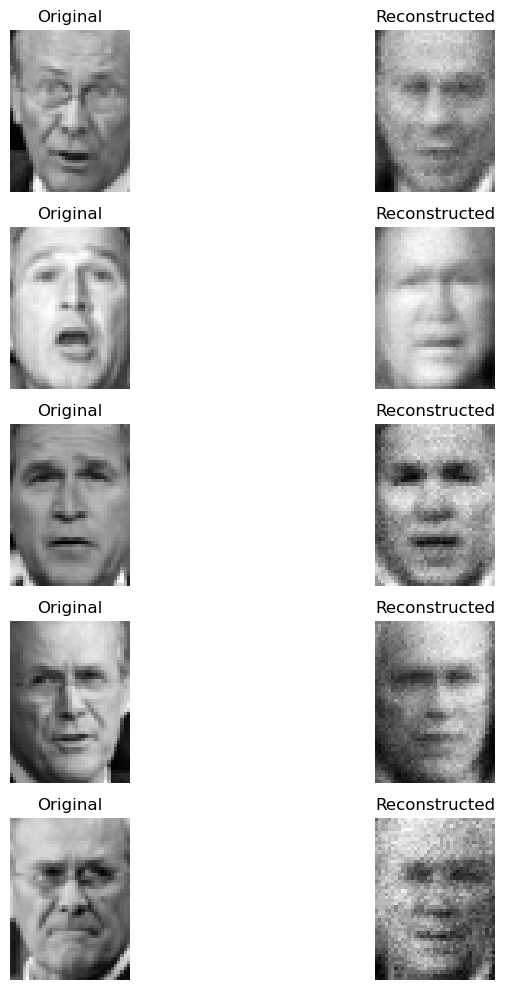

Epoch 510, Average Reconstruction Error: 0.012775578990301585
Epoch 520, Average Reconstruction Error: 0.012569823773774384
Epoch 530, Average Reconstruction Error: 0.012551974564262852
Epoch 540, Average Reconstruction Error: 0.012590461268537679
Epoch 550, Average Reconstruction Error: 0.012523202030319223
Epoch 560, Average Reconstruction Error: 0.012564015297801455
Epoch 570, Average Reconstruction Error: 0.012633892738076592
Epoch 580, Average Reconstruction Error: 0.012493959914936048
Epoch 590, Average Reconstruction Error: 0.012457782643544229
Epoch 600, Average Reconstruction Error: 0.012520779582228494
Epoch 610, Average Reconstruction Error: 0.012369446560960184
Epoch 620, Average Reconstruction Error: 0.01244248436162057
Epoch 630, Average Reconstruction Error: 0.012410899615936439
Epoch 640, Average Reconstruction Error: 0.012415124446433088
Epoch 650, Average Reconstruction Error: 0.012435303653856348
Epoch 660, Average Reconstruction Error: 0.012316171747908024
Epoch 670

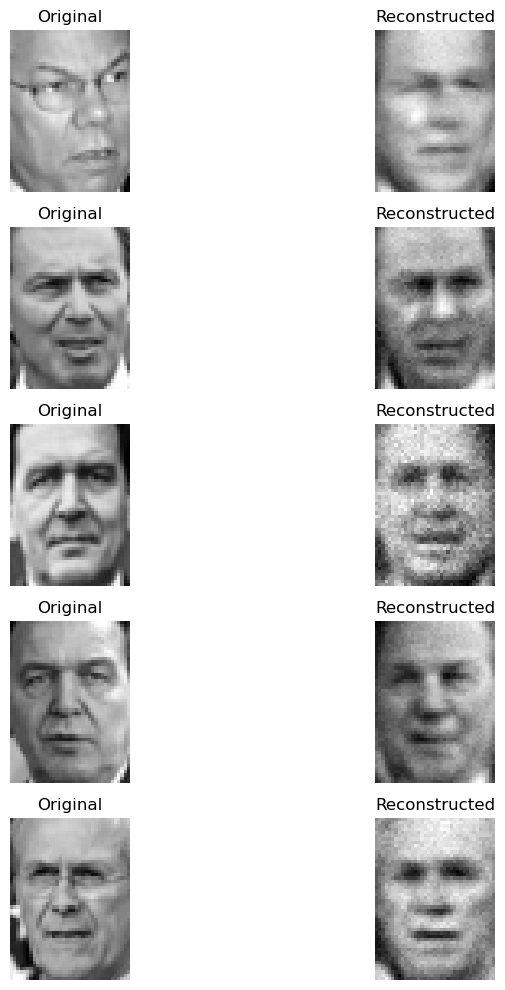

Epoch 1010, Average Reconstruction Error: 0.01200975949363655
Epoch 1020, Average Reconstruction Error: 0.011882064043118179
Epoch 1030, Average Reconstruction Error: 0.011921683050179505
Epoch 1040, Average Reconstruction Error: 0.011854831913433096
Epoch 1050, Average Reconstruction Error: 0.01185807875410363
Epoch 1060, Average Reconstruction Error: 0.011900660319943223
Epoch 1070, Average Reconstruction Error: 0.011813932610439825
Epoch 1080, Average Reconstruction Error: 0.01183461024715186
Epoch 1090, Average Reconstruction Error: 0.011883359799167801
Epoch 1100, Average Reconstruction Error: 0.011795716921271111
Epoch 1110, Average Reconstruction Error: 0.011751337285304416
Epoch 1120, Average Reconstruction Error: 0.01184967441994668
Epoch 1130, Average Reconstruction Error: 0.011796786445139856
Epoch 1140, Average Reconstruction Error: 0.011785865193313752
Epoch 1150, Average Reconstruction Error: 0.011734925456054032
Epoch 1160, Average Reconstruction Error: 0.011751200782105

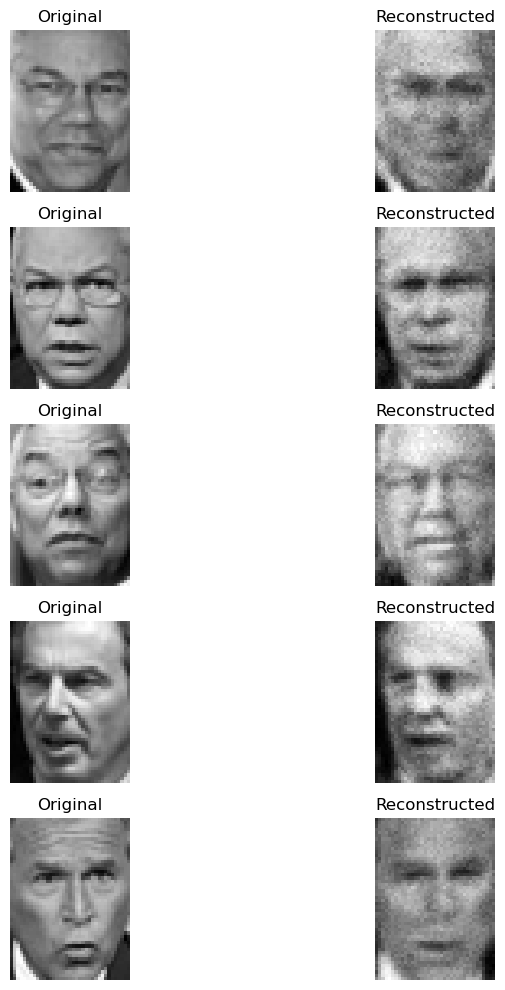

Epoch 2010, Average Reconstruction Error: 0.010712635534209283
Epoch 2020, Average Reconstruction Error: 0.010741348905682232
Epoch 2030, Average Reconstruction Error: 0.010679195690923534
Epoch 2040, Average Reconstruction Error: 0.01066751147926786
Epoch 2050, Average Reconstruction Error: 0.010707490629000857
Epoch 2060, Average Reconstruction Error: 0.010725991178757482
Epoch 2070, Average Reconstruction Error: 0.010713336101064697
Epoch 2080, Average Reconstruction Error: 0.010627046948225388
Epoch 2090, Average Reconstruction Error: 0.010620974165172221
Epoch 2100, Average Reconstruction Error: 0.01072352932099301
Epoch 2110, Average Reconstruction Error: 0.010620172101928248
Epoch 2120, Average Reconstruction Error: 0.010599245286599874
Epoch 2130, Average Reconstruction Error: 0.010546046661665831
Epoch 2140, Average Reconstruction Error: 0.010592759381306778
Epoch 2150, Average Reconstruction Error: 0.01059828167284092
Epoch 2160, Average Reconstruction Error: 0.01051578722089

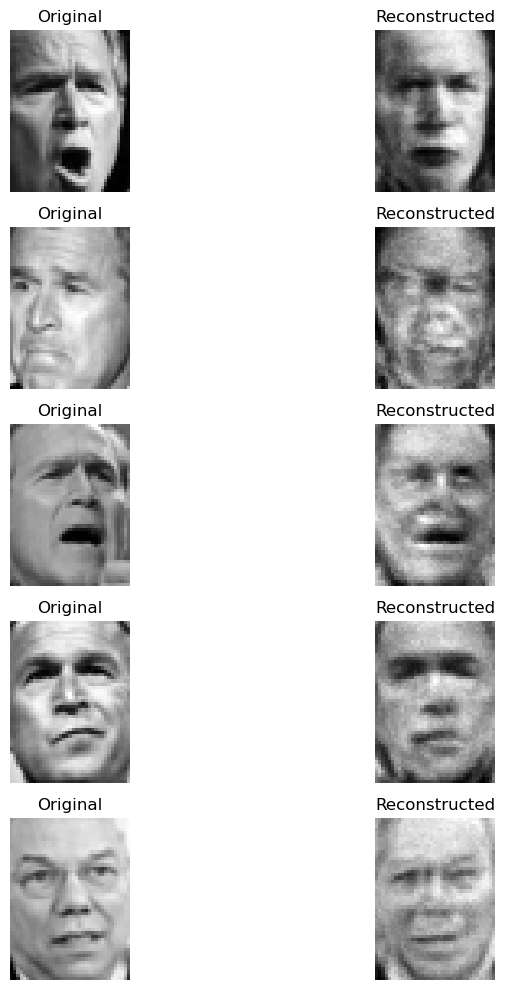

In [40]:
import numpy as np
from matplotlib.pyplot import subplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

np.random.seed(20)
# Define the Restricted Boltzmann Machine
class RestrictedBoltzmannMachine:
    def __init__(self, num_visible, num_hidden):
        # First, initialize the weights and biases. 
        # Typically, weights are initialized to small random values, and biases can be initialized to zero.
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = np.random.normal(0, 0.1, size=(num_visible, num_hidden))
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)
    # Define the sigmoid function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    # Implement a step of the Contrastive Divergence (CD) algorithm to update the weights and biases.
    def contrastive_divergence(self, batch, learning_rate, k=1):
        positive_hidden_probabilities = self.sigmoid(np.dot(batch, self.weights) + self.hidden_bias)
        positive_hidden_states = (
                    positive_hidden_probabilities > np.random.rand(*positive_hidden_probabilities.shape)).astype(float)
        negative_visible_probabilities = self.sigmoid(
            np.dot(positive_hidden_states, self.weights.T) + self.visible_bias)
        negative_hidden_probabilities = self.sigmoid(
            np.dot(negative_visible_probabilities, self.weights) + self.hidden_bias)

        weight_update = np.dot(batch.T, positive_hidden_probabilities) - np.dot(negative_visible_probabilities.T,
                                                                                negative_hidden_probabilities)
        self.weights += learning_rate * weight_update / batch.shape[0]

        self.visible_bias += learning_rate * np.mean(batch - negative_visible_probabilities, axis=0)
        self.hidden_bias += learning_rate * np.mean(positive_hidden_probabilities - negative_hidden_probabilities,
                                                    axis=0)
        error = np.mean((batch - negative_visible_probabilities) ** 2)
        return error

    # Define the training process. (Also set some default value for the parameter)
    def train(self, data, learning_rate=0.01, num_epochs=3000, batch_size=32):
        for epoch in range(num_epochs):
            np.random.shuffle(data)
            total_batches = 0
            total_error = 0
            for i in range(0, data.shape[0], batch_size):
                batch = data[i:i + batch_size]
                total_batches += 1
                total_error += self.contrastive_divergence(batch, learning_rate)

            avg_error = total_error / total_batches
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}, Average Reconstruction Error: {avg_error}")

                # show figure dynamicly
                if epoch + 1 in [100, 500, 1000, 2000]:  
                    sample_reconstructed = self.reconstruct(data[:5])
                    print(sample_reconstructed)
                    
                    plot_images(data[:5], sample_reconstructed, num_images=5)

    # Define the process calculating the probabilities for hidden nodes.

    def extract(self, data):
        hidden_probabilities = self.sigmoid(np.dot(data, self.weights) + self.hidden_bias)
        return hidden_probabilities

    def reconstruct(self, data):
        hidden_probabilities = self.extract(data)
        hidden_states = (hidden_probabilities > np.random.rand(*hidden_probabilities.shape)).astype(float)
        reconstructed_data = self.sigmoid(np.dot(hidden_states, self.weights.T) + self.visible_bias)
        return reconstructed_data
    
    
# Define the plot function for reconstruction.
def plot_images(original, reconstructed, num_images):
    plt.figure(figsize=(10, 2 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i + 1)
        plt.imshow(original[i].reshape(50, 37), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(num_images, 2, 2*i + 2)
        plt.imshow(reconstructed[i].reshape(50, 37), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# load the LFW data (Check the loading function and provide appropriate parameters)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
X_plot = lfw_people.images
y = lfw_people.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
target_names = lfw_people.target_names
num_classes = max(y)+1

# Define how many images you want to display
n_images = 4

# Create a grid plot with matplotlib
fig, ax = plt.subplots(1, n_images, figsize=(15, 10))
for i in range(n_images):
    ax[i].imshow(X_plot[i], cmap='gray')  # Display images in grayscale
    ax[i].set_title(target_names[y[i]])  # Set the title to the person's name
    ax[i].axis('off')  # Turn off axis numbering
plt.show()
    
# Initialize and train the RBM model
num_visible = X_train.shape[1]
num_hidden = 256  # 设置隐藏单元数量，可以根据需要调整
rbm = RestrictedBoltzmannMachine(num_visible, num_hidden)

# 训练模型
rbm.train(X_train, learning_rate=0.01, num_epochs=3000, batch_size=32)

# # Plot the sampe reconstructed by the trained model
num_plot = 5
test_data = X_test[:num_plot]  # First [num_plot] images
reconstructed_data = rbm.reconstruct(test_data)
# reconstructed_data = (reconstructed_data * 255).clip(0, 255)

plot_images(test_data, reconstructed_data, num_images=num_plot)

Only use sklearn model

In [54]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the LFW dataset
lfw_data = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
features = lfw_data.data  
labels = lfw_data.target  

class RBMFeatureExtractor:
    def __init__(self, rbm_model):
        self.rbm_model = rbm_model

    def extract_features(self, data):
        features = self.rbm_model.extract(data)
        return features

def train_mlp_classifier(features, labels, hidden_dim):
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(hidden_dim,), max_iter=10000, random_state=33)
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.1, random_state=33)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val)
    return y_val, y_pred

def train_knn_classifier(features, labels, n_neighbors=3):
    # Train
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.1, random_state=33)
    
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    
    return y_val, y_pred

def evaluate_classifier(true, pred, average='weighted'):
    acc = accuracy_score(true, pred)
    pre = precision_score(true, pred, average=average)
    recall = recall_score(true, pred, average=average)
    f1 = f1_score(true, pred, average=average)
    print(f"Accuracy: {acc}")
    print(f"Precision: {pre}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

feature_extractor = RBMFeatureExtractor(rbm)  # Using q1 trained rbm
features = feature_extractor.extract_features(features)

# Train MLP
hidden_dim = 2048  
y_val, mlp_predictions = train_mlp_classifier(features, labels, hidden_dim)
print("-----------------------")
# Evaluate MLP
print("MLP Model Performance:")
evaluate_classifier(y_val, mlp_predictions)
print("-----------------------")

# Train KNN
y_val, knn_predictions = train_knn_classifier(features, labels)
# Evaluate KNN
print("KNN Model Performance:")
evaluate_classifier(y_val, knn_predictions)
print("-----------------------")

-----------------------
MLP Model Performance:
Accuracy: 0.8062015503875969
Precision: 0.8118955334071614
Recall: 0.8062015503875969
F1 Score: 0.7980967686239093
-----------------------
KNN Model Performance:
Accuracy: 0.5426356589147286
Precision: 0.559722971779777
Recall: 0.5426356589147286
F1 Score: 0.5287743720028262
-----------------------


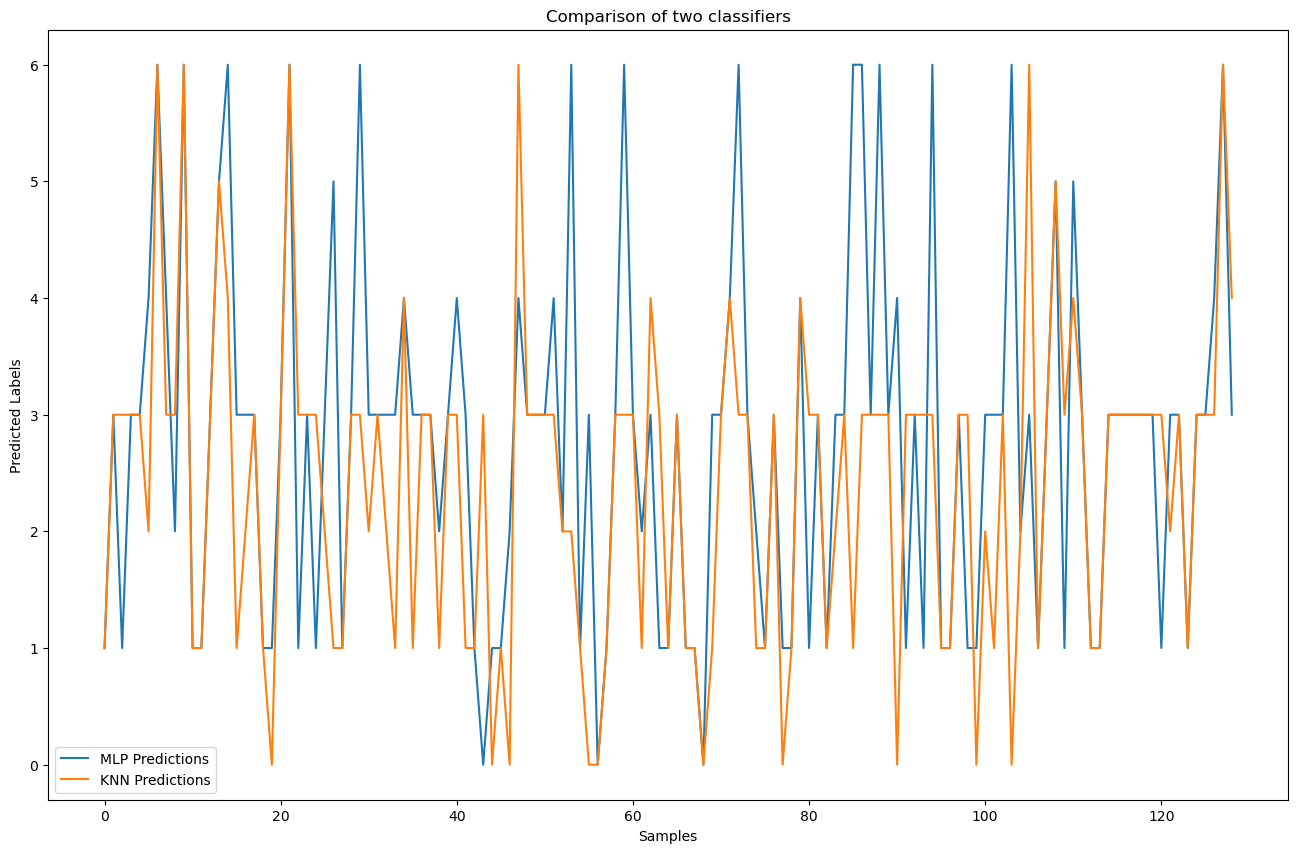

In [58]:
plt.figure(figsize=(16, 10))
plt.plot(mlp_predictions, label="MLP Predictions")
plt.plot(knn_predictions, label="KNN Predictions")
plt.xlabel('Samples')
plt.ylabel('Predicted Labels')
plt.title('Comparison of two classifiers')
plt.legend()
plt.show()


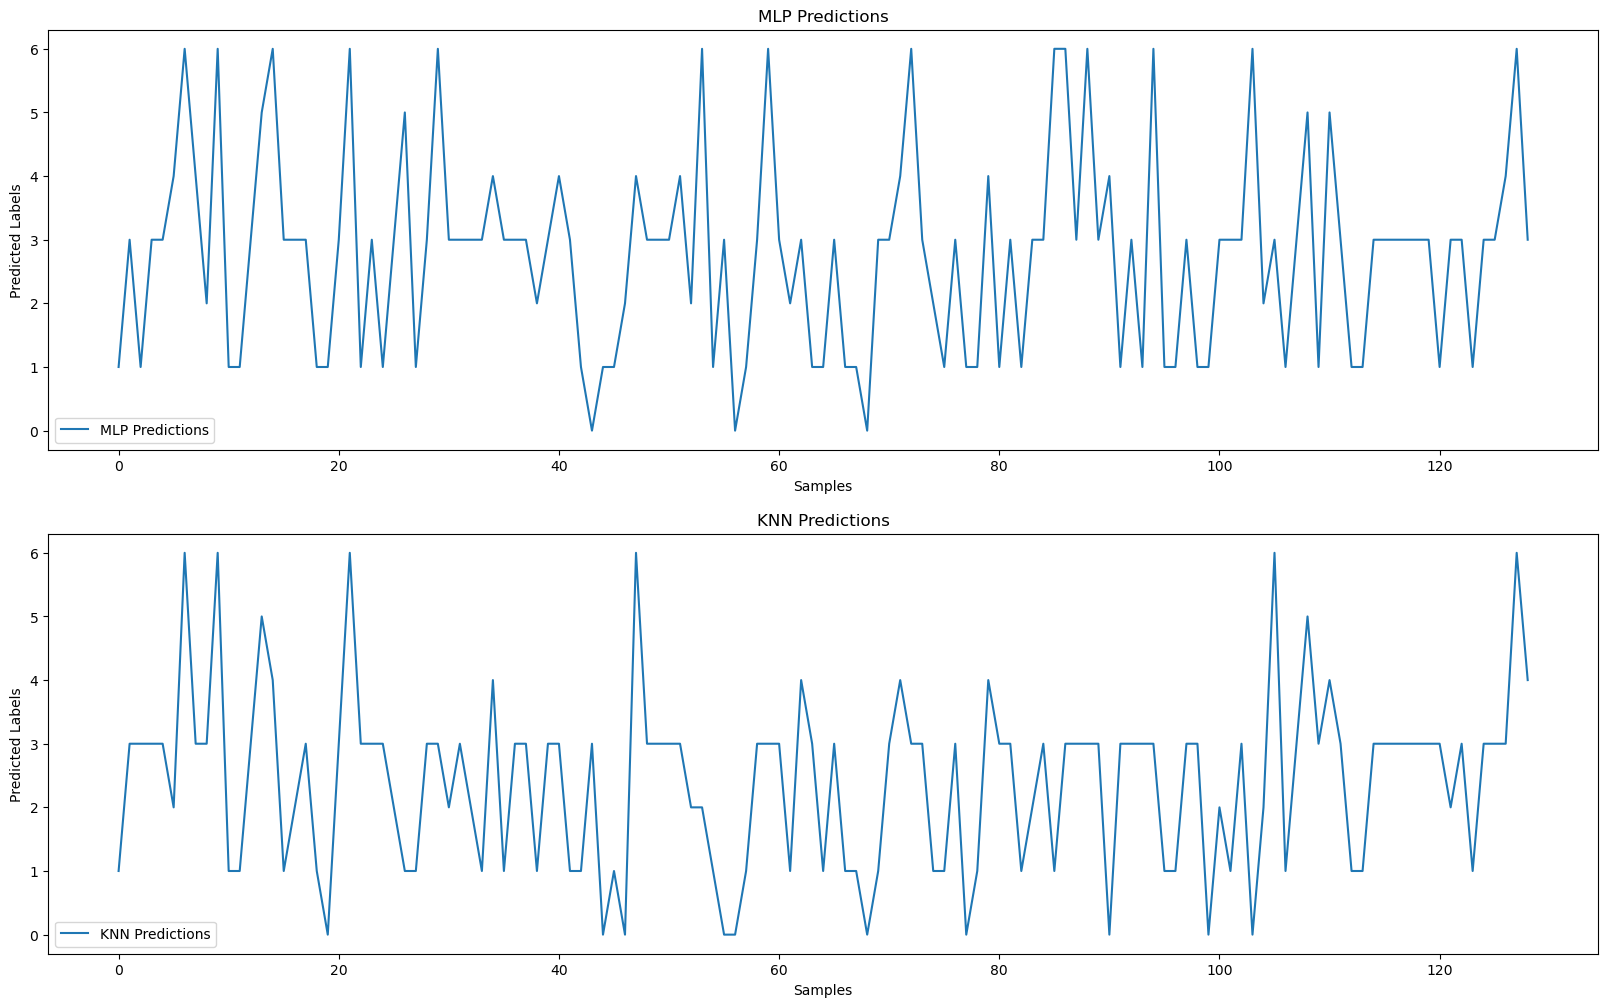

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)  
plt.plot(mlp_predictions, label="MLP Predictions")
plt.xlabel('Samples')
plt.ylabel('Predicted Labels')
plt.title('MLP Predictions')
plt.legend()

plt.subplot(2, 1, 2)  
plt.plot(knn_predictions, label="KNN Predictions")
plt.xlabel('Samples')
plt.ylabel('Predicted Labels')
plt.title('KNN Predictions')
plt.legend()

plt.show()